** Hypothesis **

Is marijuana a gateway drug?

** Deliverables **

Plot marijuana use vs other drug uses and look for patterns.

In [30]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings('ignore')

"drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age

In [3]:
drug = pd.read_csv('./drug-use-by-age.csv')

In [4]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [5]:
drug

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [31]:
# Convert missing values to NaNs.


for column in drug.columns:
    if sum(drug[column].isnull()) != 0:
        print column, sum(drug[column].isnull())
        
    for index in range(0, len(drug[column])):
        if drug[column][index] == '-':
            drug[column][index] = np.nan

cocaine-frequency 1
crack-frequency 3
heroin-frequency 1
inhalant-frequency 1
oxycontin-frequency 1
meth-frequency 2


In [32]:
# convert values in all columns but drug.age into floats

for column in drug.columns:
    if column != 'age':
        for index in range(0, len(drug)):
            drug[column][index] = float(drug[column][index])

In [8]:
drug.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5,0.0,NaN,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1,0.0,3,...,0.1,41,0.3,25.5,0.3,4.0,0.1,5,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4,0.1,9.5,...,0.8,3,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7,0.0,1,...,1.1,4,2.4,11.0,1.8,9.5,0.3,36,0.2,3.0


In [9]:
drug['age'][10][:2]

'22'

In [33]:
# clean up data column

'''

I am keeping only the first number out of the age column for clarity.

'''

for row in range(0, len(drug['age'])):
    drug['age'][row] = drug['age'][row][:2]

In [11]:
drug.isnull().sum()

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          1
crack-use                  0
crack-frequency            3
heroin-use                 0
heroin-frequency           1
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         1
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        1
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             2
sedative-use               0
sedative-frequency         0
dtype: int64

## It doesn't make sense to draw correlations between drugs, but it might be interesting to see if age is correlated with each drug's percent use.

/Users/sophie/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


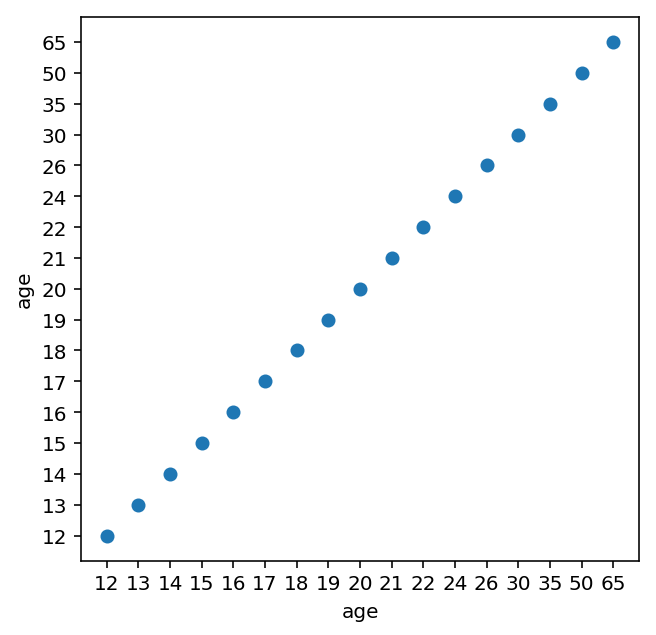

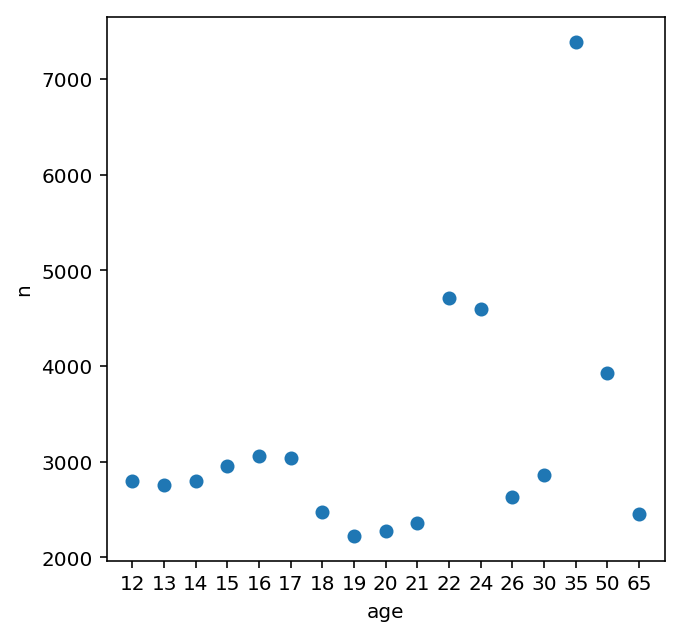

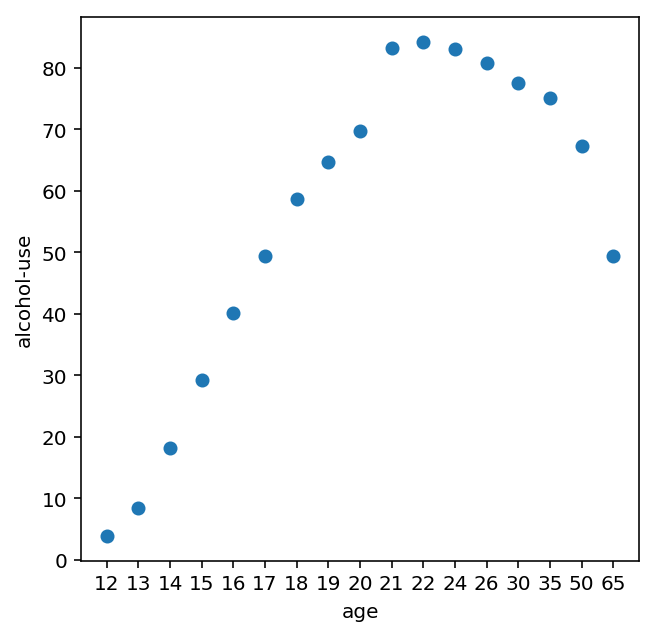

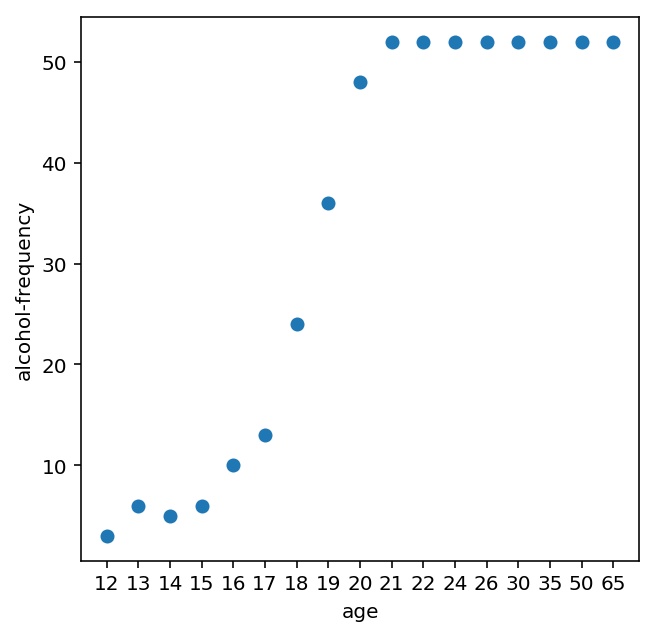

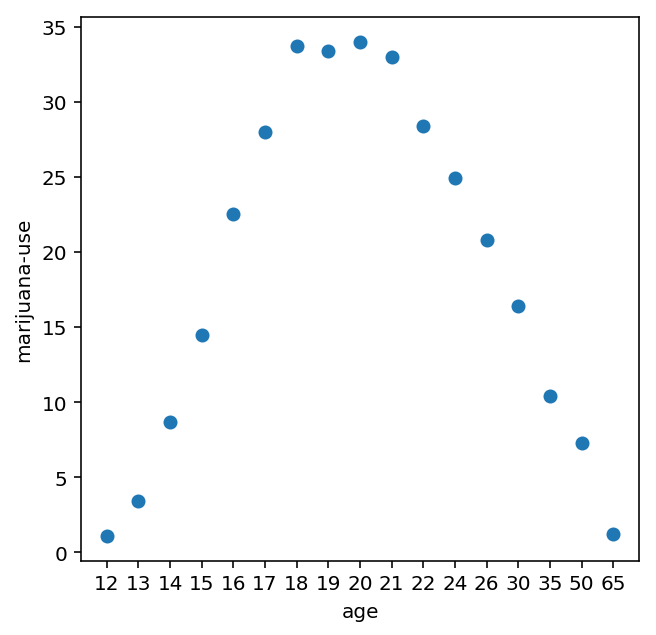

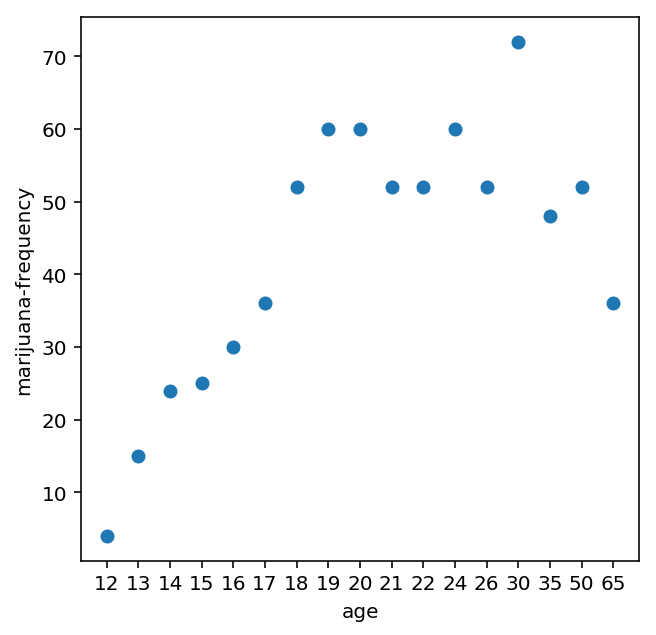

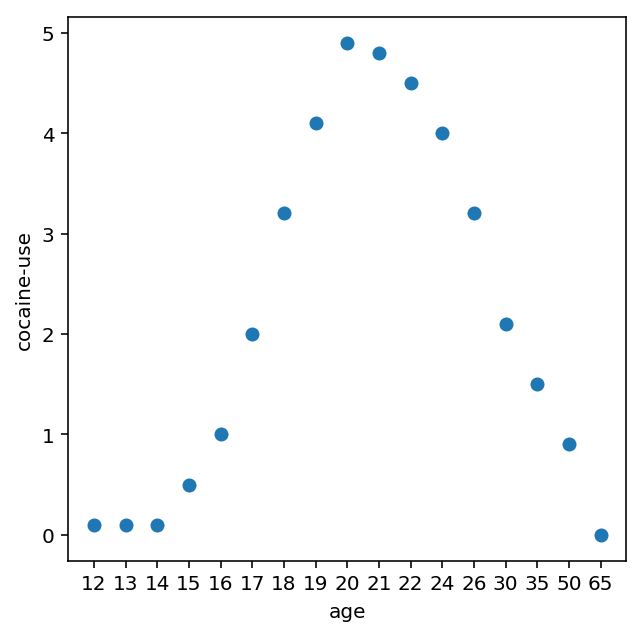

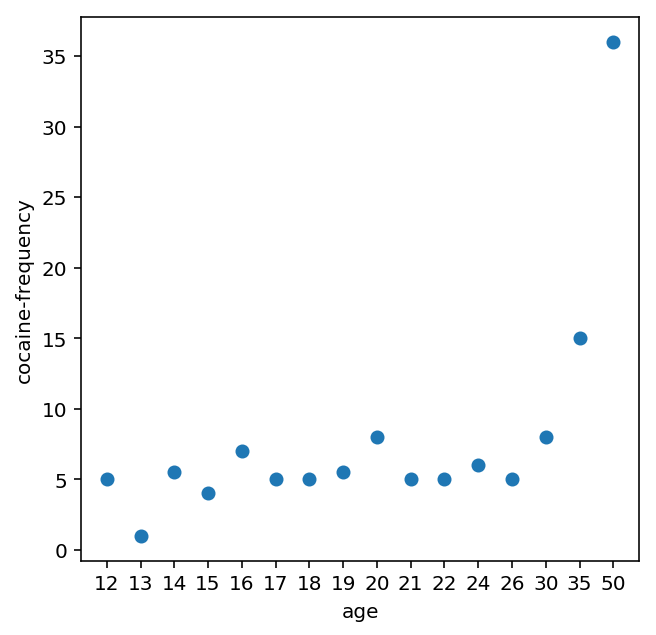

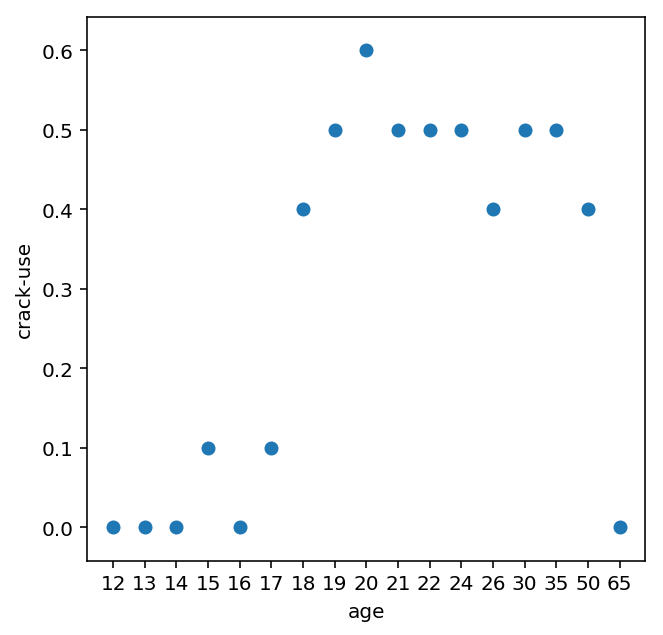

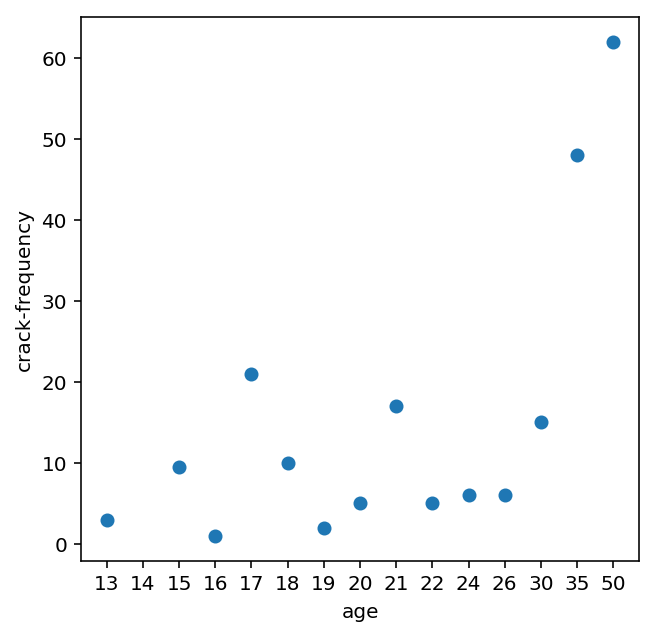

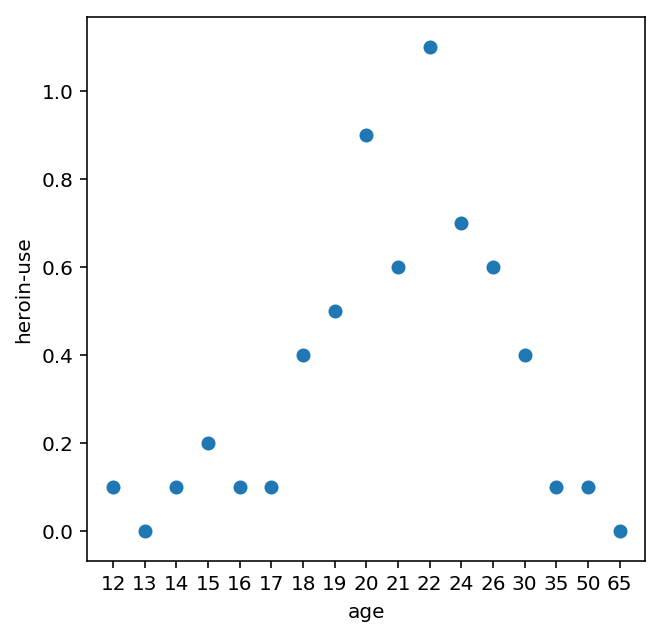

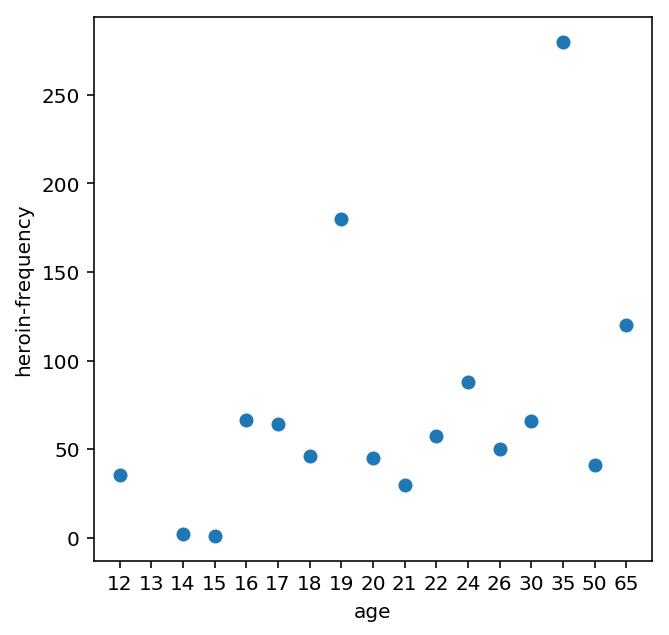

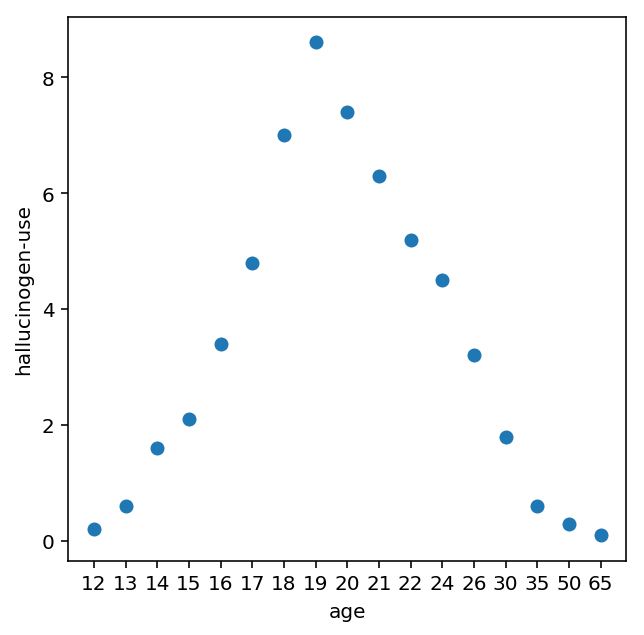

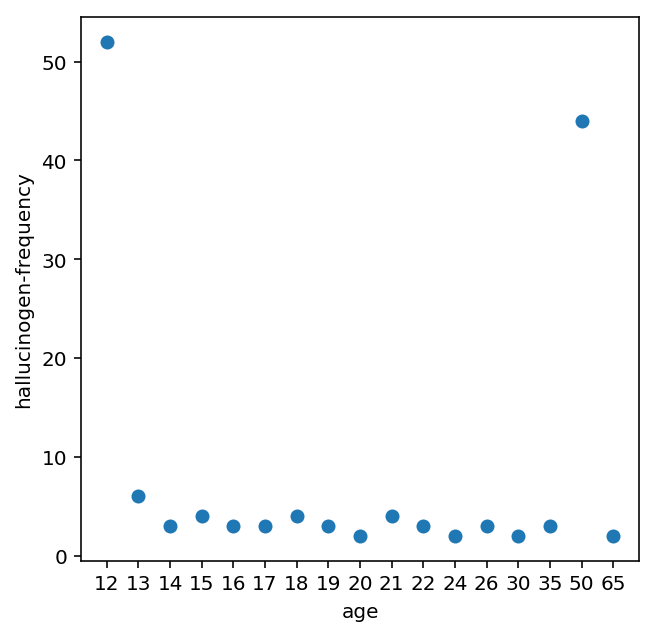

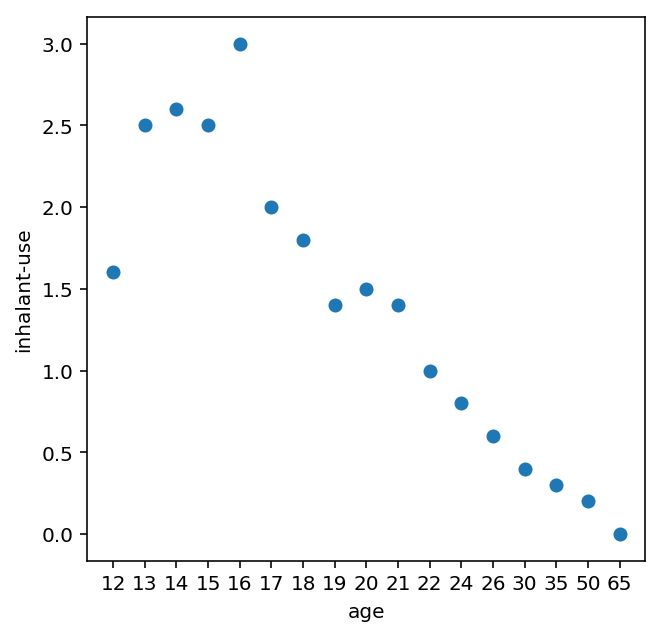

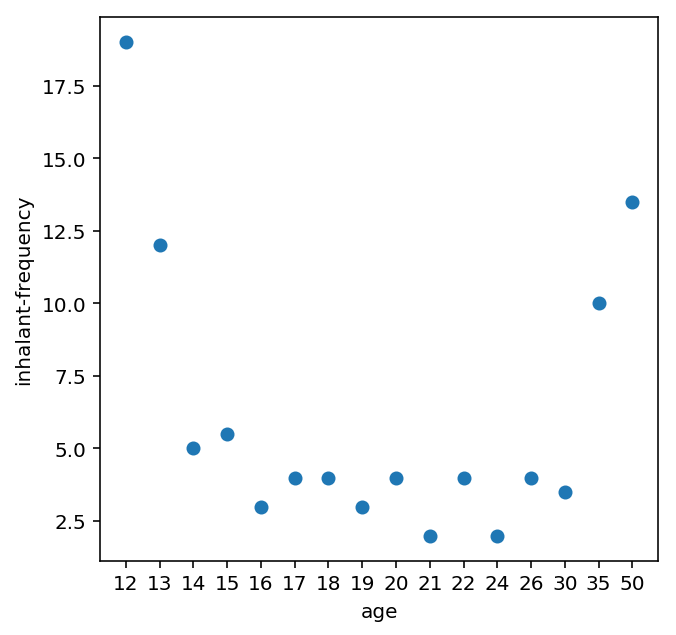

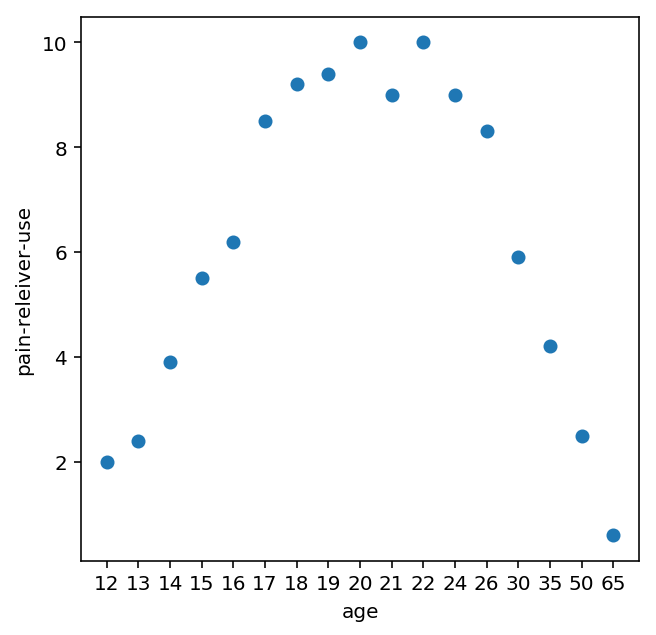

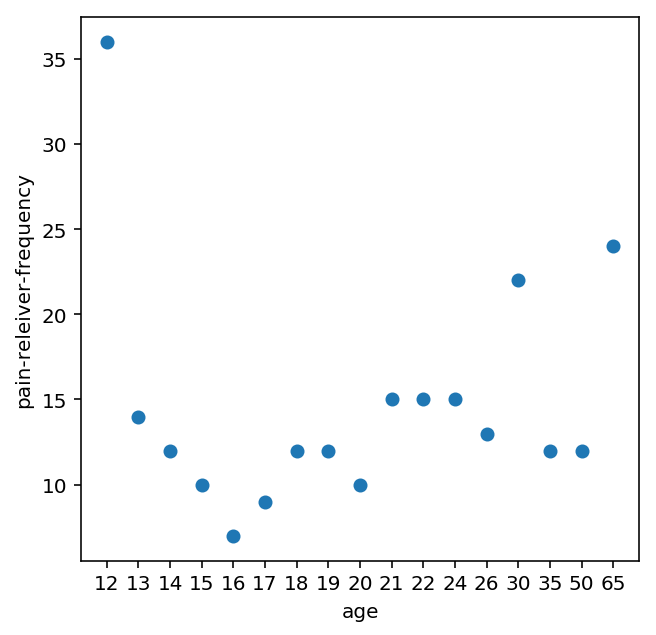

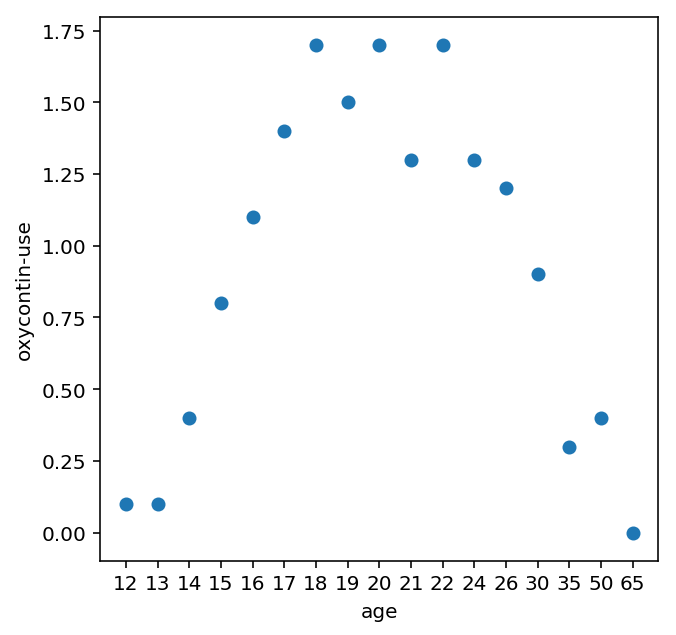

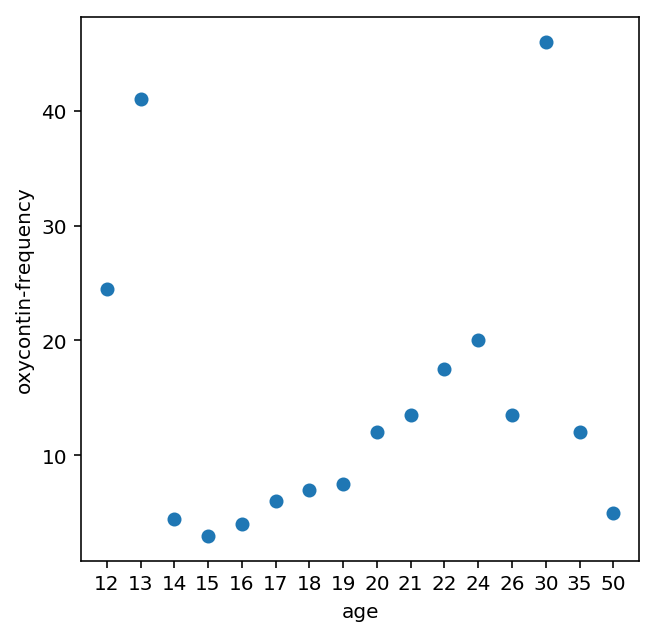

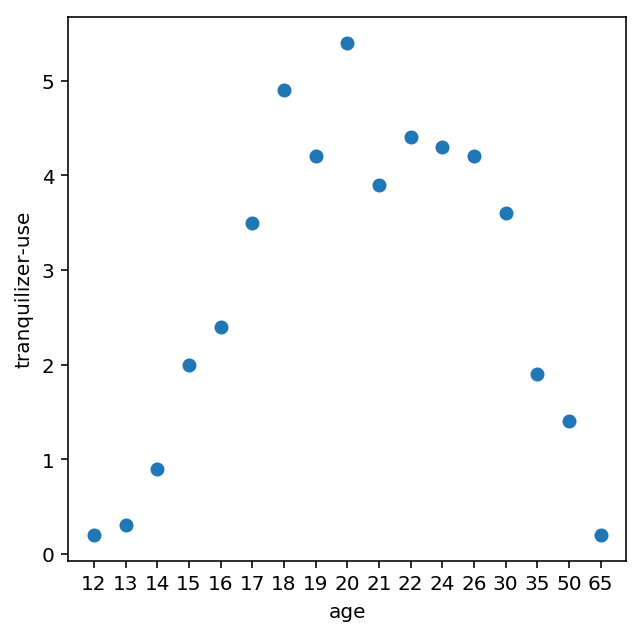

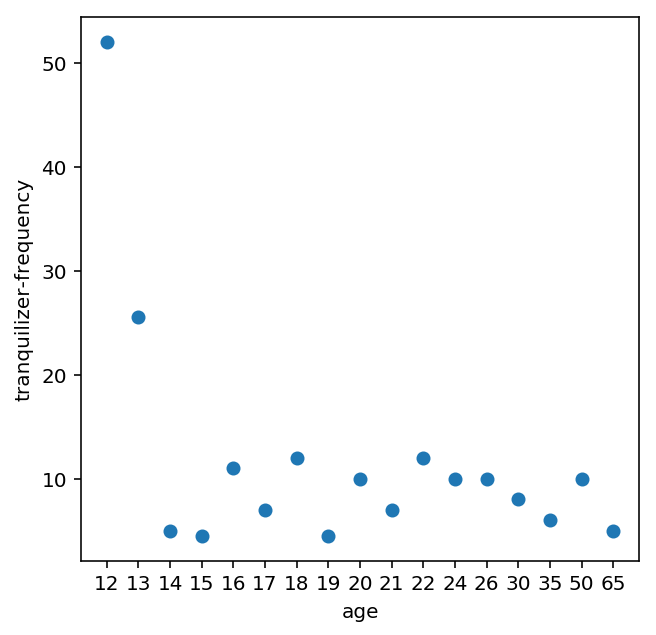

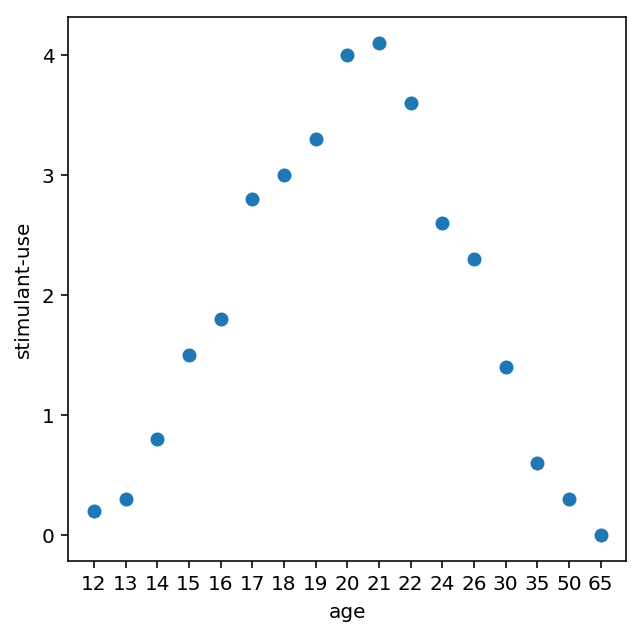

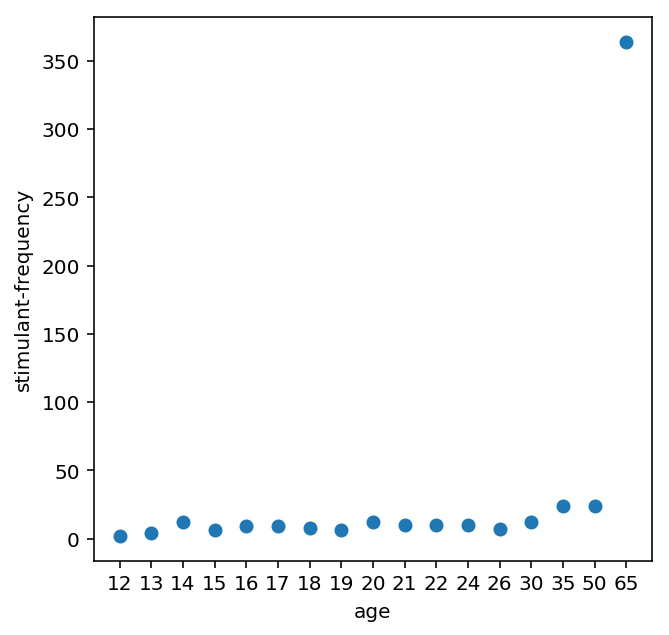

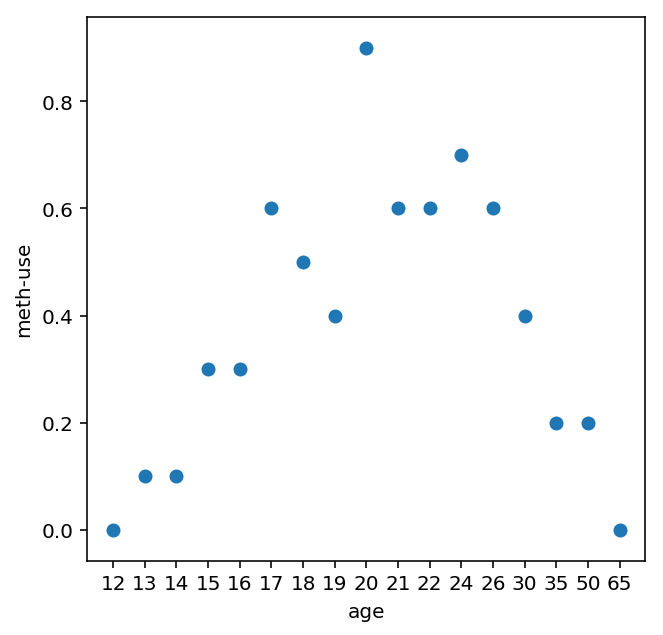

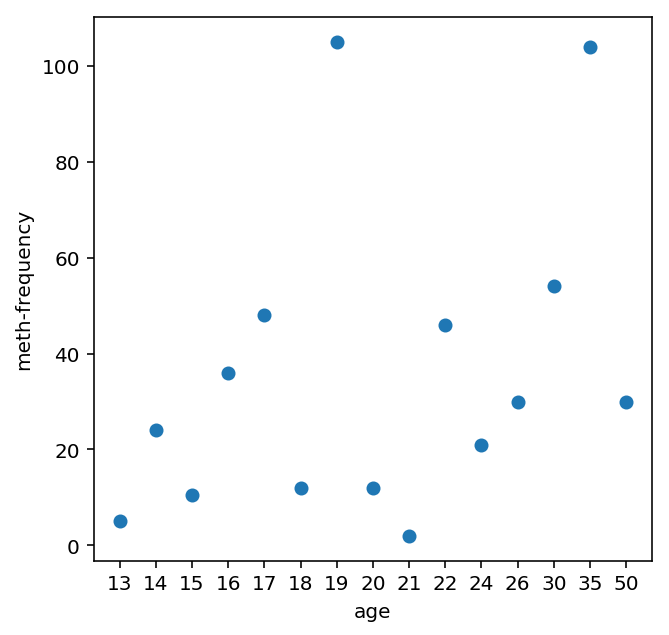

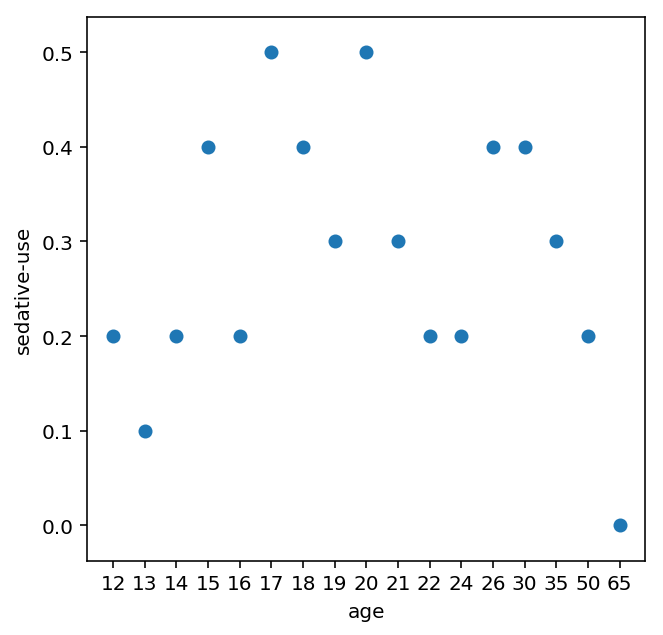

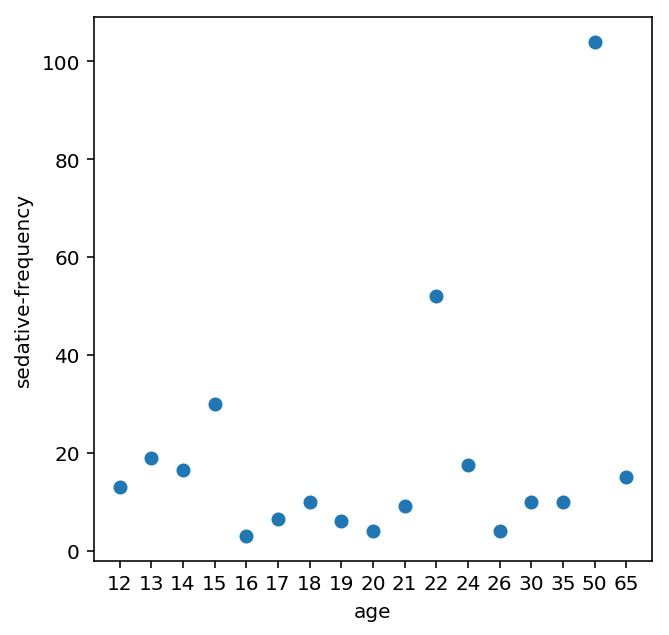

In [12]:
# visualize how all the columns relate to age. 
for column in drug.columns:
    fig = plt.figure(figsize=(5, 5))
    plt.scatter(drug['age'], drug[column])
    plt.xlabel('age')
    plt.ylabel(column)
# notice that frequency is not the only interesting relationship. percent use is fun too!    

Text(0.5,1,u'Mean drug use by age')

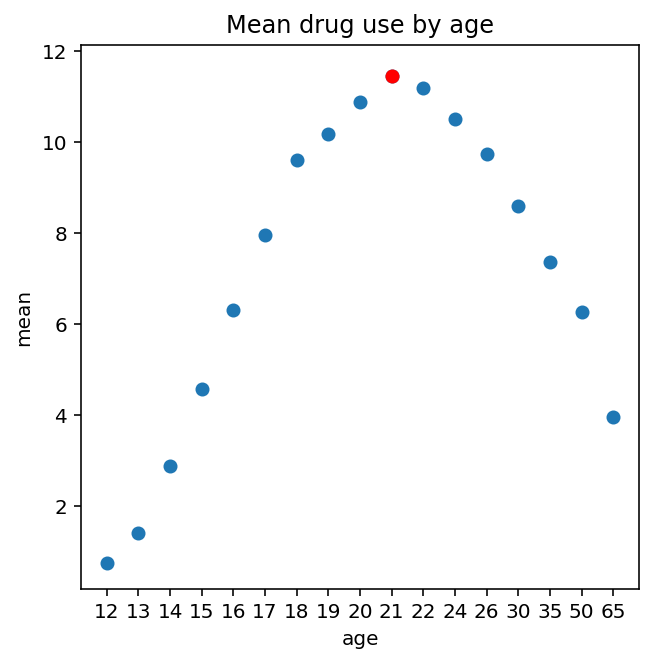

In [34]:
# see what is the mean percent of use across age groups and plot it to see which age is most vulnerable


''' Set up columns we are interested in and create a dataframe to store the information in. '''

columns = [drug['alcohol-use'], drug['marijuana-use'], drug['cocaine-use'],
           drug['crack-use'], drug['heroin-use'], drug['hallucinogen-use'], 
           drug['inhalant-use'], drug['pain-releiver-use'], drug['oxycontin-use'], 
           drug['tranquilizer-use'], drug['stimulant-use'], drug['meth-use'], drug['sedative-use']]

mean = pd.DataFrame(index = range(0, len(drug)), columns = ['age', 'mean'])


''' Fill in the dataframe - copy over the drug.age column and compute means for age groups. '''

for index in range(0, len(drug)):
    use_across_age = []
    mean['age'][index] = drug['age'][index]
    
    for counter in range(0, len(columns)):
        use_across_age.append(columns[counter][index])
        
    mean['mean'][index] = np.mean(use_across_age)

''' Add a column with all NAs but at 21'''

mean['artificial'] = np.nan
mean['artificial'][9] = mean['mean'][9]
    
''' Graph a scatterplot of the means across the age. '''

fig = plt.figure(figsize=(5, 5))
plt.scatter(mean['age'], mean['mean'])
plt.scatter(mean['age'], mean['artificial'], color = 'red')
plt.xlabel('age')
plt.ylabel('mean')
plt.title('Mean drug use by age')

** Comments **

1. The use of drugs peaks at 21.
2. The sample sizes are widely different.
3. Alcohol use has a discontinuity at age 21 where it jumps 10%.
4. Alcohol use frequency stays constant after the age of 21.
5. Marihuana use follows are more normal distribution, but the frequencies of use are vastly different with the highest at 35 years old.
6. Cocaine frequency has a drastic increase after the age of 30.
7. Heroin use spikes at the age of 20 and 22. Morbid as it is, a possibility is overdose and death.
8. 12- and 50-year olds are very fond of hallucinogens.
9. Inhalant use decreases with age almost linearly.
10. 12- and 13-year olds have a very high frequency of tranquilizer use.
11. 65+ year olds use a LOT of stimulants.
12. Sedative use looks like two curves.

Text(0,0.5,u'sample size')

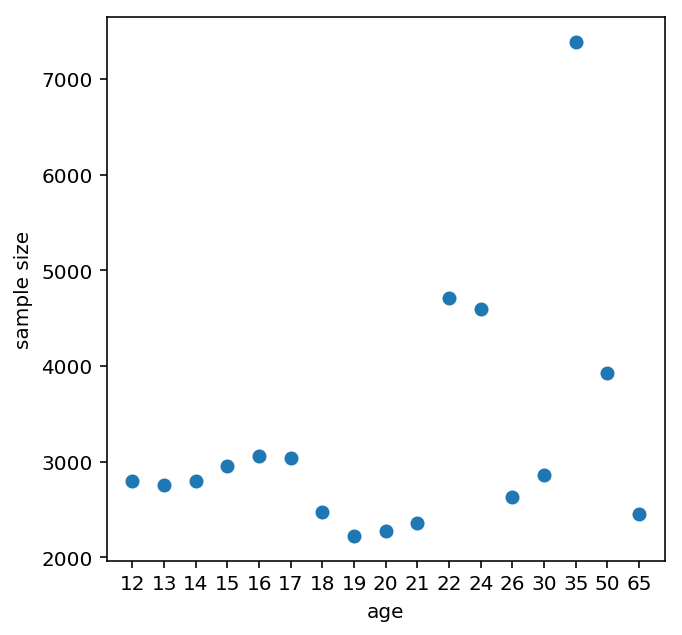

In [14]:
''' 

scatterplot of the age vs n columns

How many people in each age group?


'''

fig = plt.figure(figsize=(5, 5))
plt.scatter(drug['age'], drug['n'])
plt.xlabel('age')
plt.ylabel('sample size')

In [15]:
drug.columns

Index([u'age', u'n', u'alcohol-use', u'alcohol-frequency', u'marijuana-use',
       u'marijuana-frequency', u'cocaine-use', u'cocaine-frequency',
       u'crack-use', u'crack-frequency', u'heroin-use', u'heroin-frequency',
       u'hallucinogen-use', u'hallucinogen-frequency', u'inhalant-use',
       u'inhalant-frequency', u'pain-releiver-use', u'pain-releiver-frequency',
       u'oxycontin-use', u'oxycontin-frequency', u'tranquilizer-use',
       u'tranquilizer-frequency', u'stimulant-use', u'stimulant-frequency',
       u'meth-use', u'meth-frequency', u'sedative-use', u'sedative-frequency'],
      dtype='object')

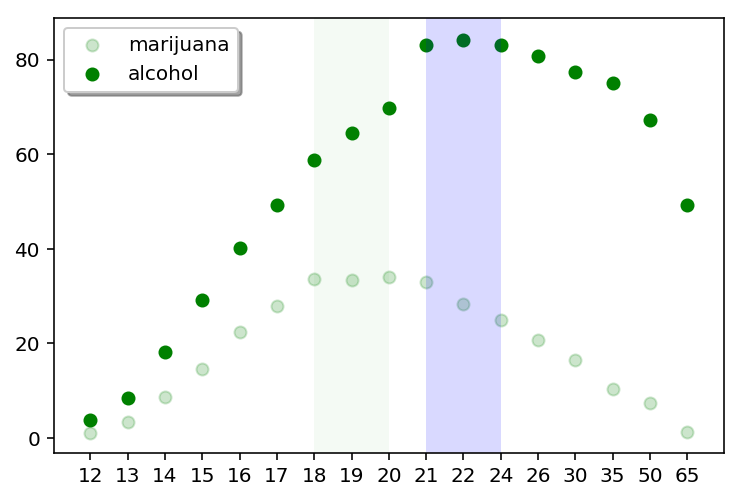

In [16]:
# marijuana vs alcohol

fig, ax = plt.subplots()
plt.scatter(drug['age'], drug['marijuana-use'], color = 'green', alpha = 0.2, label = 'marijuana')
plt.scatter(drug['age'], drug['alcohol-use'], color = 'green', label = 'alcohol')
p = plt.axvspan(18, 20, facecolor='#2ca02c', alpha=0.05)
p = plt.axvspan(21, 24, facecolor='blue', alpha=0.15)
legend = ax.legend(loc='upper left', shadow=True)

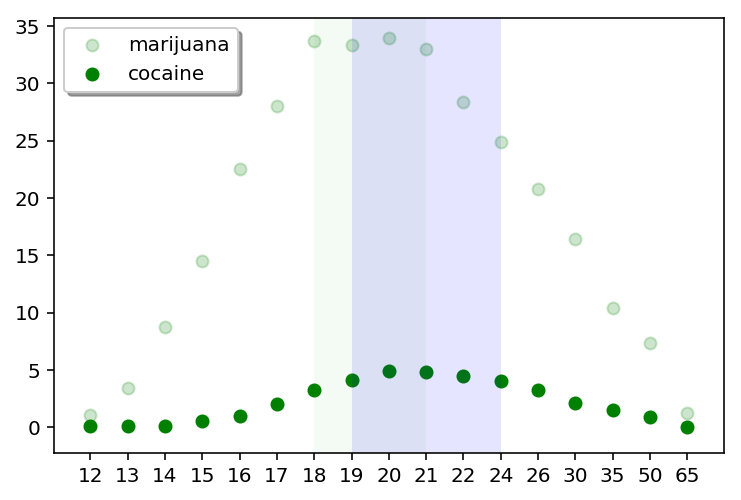

In [17]:
fig, ax = plt.subplots()
plt.scatter(drug['age'], drug['marijuana-use'], color = 'green', alpha = 0.2, label = 'marijuana')
plt.scatter(drug['age'], drug['cocaine-use'], color = 'green', label = 'cocaine')
p = plt.axvspan(18, 21, facecolor='#2ca02c', alpha=0.05)
p = plt.axvspan(19, 24, facecolor='blue', alpha=0.1)
legend = ax.legend(loc='upper left', shadow=True)

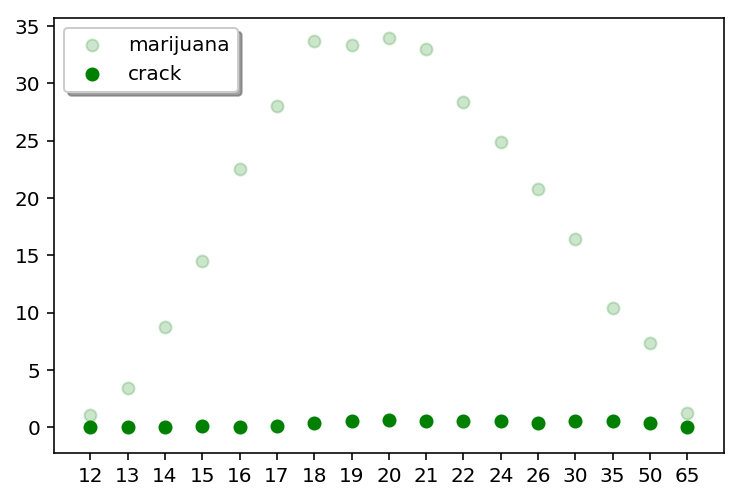

In [18]:
fig, ax = plt.subplots()
plt.scatter(drug['age'], drug['marijuana-use'], color = 'green', alpha = 0.2, label = 'marijuana')
plt.scatter(drug['age'], drug['crack-use'], color = 'green', label = 'crack')
legend = ax.legend(loc='upper left', shadow=True)

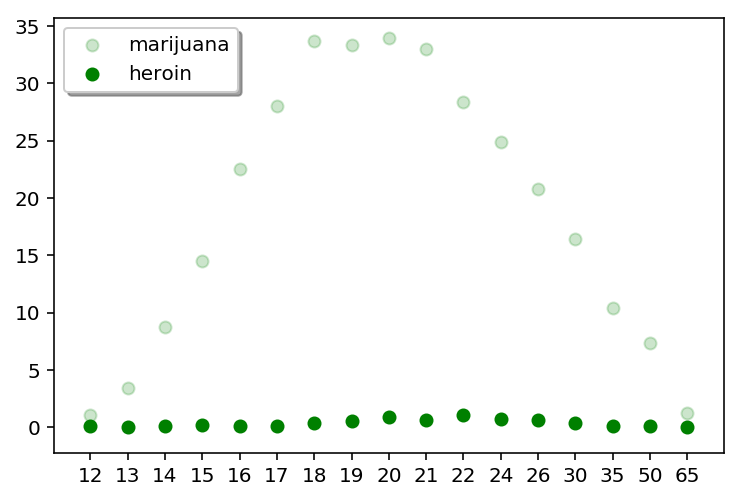

In [19]:
fig, ax = plt.subplots()
plt.scatter(drug['age'], drug['marijuana-use'], color = 'green', alpha = 0.2, label = 'marijuana')
plt.scatter(drug['age'], drug['heroin-use'], color = 'green', label = 'heroin')
legend = ax.legend(loc='upper left', shadow=True)

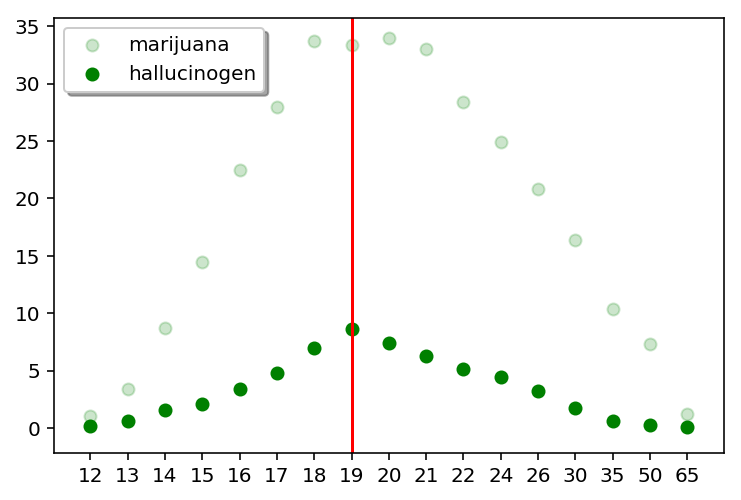

In [20]:
fig, ax = plt.subplots()
plt.scatter(drug['age'], drug['marijuana-use'], color = 'green', alpha = 0.2, label = 'marijuana')
plt.scatter(drug['age'], drug['hallucinogen-use'], color = 'green', label = 'hallucinogen')
# p = plt.axvspan(17, 22, facecolor='#2ca02c', alpha=0.05)
# p = plt.axvspan(19, 24, facecolor='blue', alpha=0.1)
legend = ax.legend(loc='upper left', shadow=True)
l = plt.axvline(x=19, color = 'red')

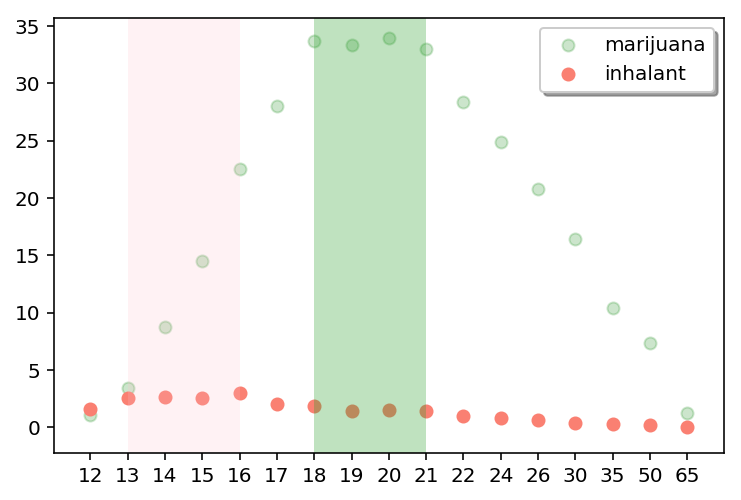

In [21]:
fig, ax = plt.subplots()
plt.scatter(drug['age'], drug['marijuana-use'], color = 'green', alpha = 0.2, label = 'marijuana')
plt.scatter(drug['age'], drug['inhalant-use'], color = 'salmon', label = 'inhalant')
p = plt.axvspan(13, 16, facecolor='pink', alpha=0.2)
p = plt.axvspan(18, 21, facecolor='#2ca02c', alpha=0.3)
legend = ax.legend(loc='upper right', shadow=True)

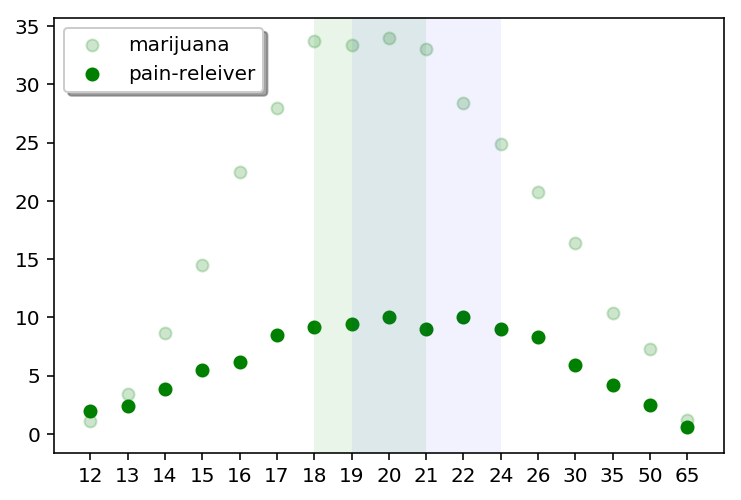

In [22]:
fig, ax = plt.subplots()
plt.scatter(drug['age'], drug['marijuana-use'], color = 'green', alpha = 0.2, label = 'marijuana')
plt.scatter(drug['age'], drug['pain-releiver-use'], color = 'green', label = 'pain-releiver')
p = plt.axvspan(18, 21, facecolor='#2ca02c', alpha=0.1)
p = plt.axvspan(19, 24, facecolor='blue', alpha=0.05)
legend = ax.legend(loc='upper left', shadow=True)

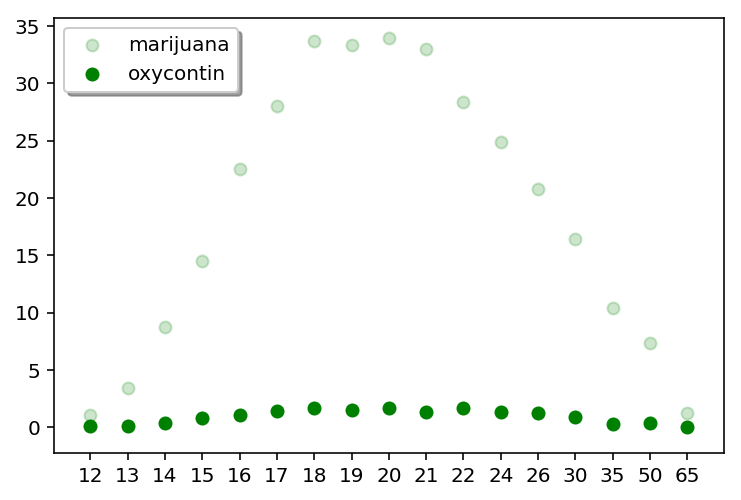

In [23]:
fig, ax = plt.subplots()
plt.scatter(drug['age'], drug['marijuana-use'], color = 'green', alpha = 0.2, label = 'marijuana')
plt.scatter(drug['age'], drug['oxycontin-use'], color = 'green', label = 'oxycontin')
# p = plt.axvspan(17, 22, facecolor='#2ca02c', alpha=0.05)
# p = plt.axvspan(19, 24, facecolor='blue', alpha=0.1)
legend = ax.legend(loc='upper left', shadow=True)

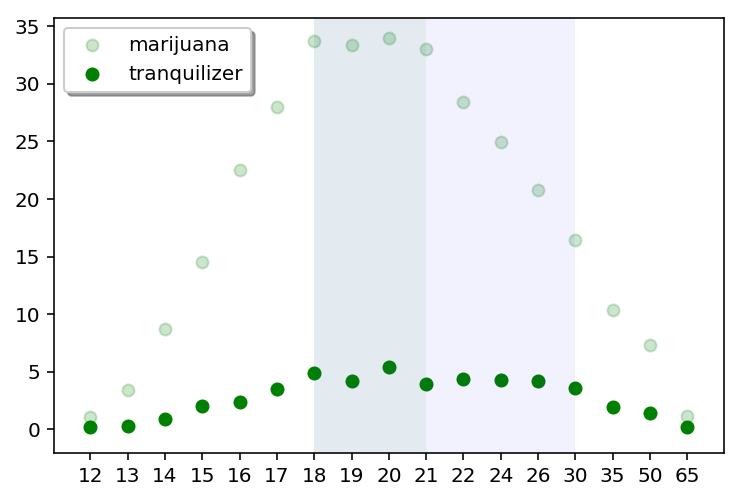

In [24]:
fig, ax = plt.subplots()
plt.scatter(drug['age'], drug['marijuana-use'], color = 'green', alpha = 0.2, label = 'marijuana')
plt.scatter(drug['age'], drug['tranquilizer-use'], color = 'green', label = 'tranquilizer')
p = plt.axvspan(18, 21, facecolor='#2ca02c', alpha=0.07)
p = plt.axvspan(18, 30, facecolor='blue', alpha=0.05)
legend = ax.legend(loc='upper left', shadow=True)

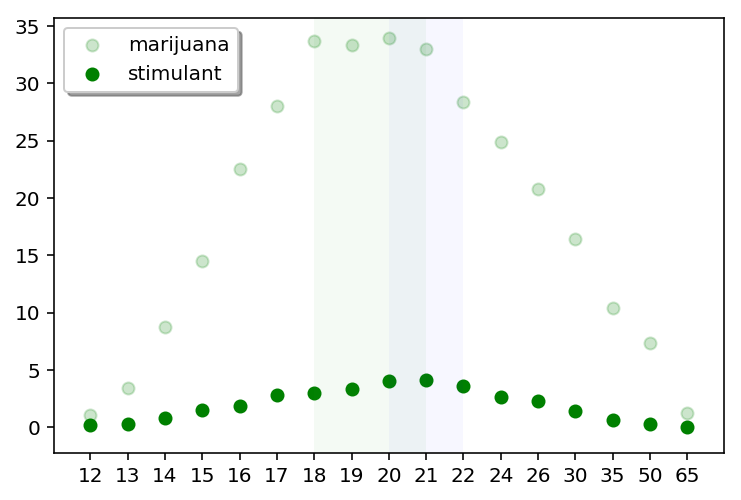

In [25]:
fig, ax = plt.subplots()
plt.scatter(drug['age'], drug['marijuana-use'], color = 'green', alpha = 0.2, label = 'marijuana')
plt.scatter(drug['age'], drug['stimulant-use'], color = 'green', label = 'stimulant')
p = plt.axvspan(18, 21, facecolor='#2ca02c', alpha=0.05)
p = plt.axvspan(20, 22, facecolor='blue', alpha=0.03)
legend = ax.legend(loc='upper left', shadow=True)

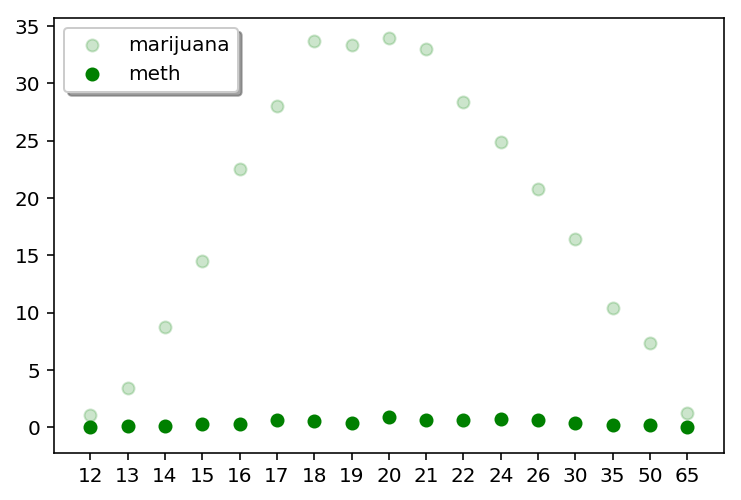

In [26]:
fig, ax = plt.subplots()
plt.scatter(drug['age'], drug['marijuana-use'], color = 'green', alpha = 0.2, label = 'marijuana')
plt.scatter(drug['age'], drug['meth-use'], color = 'green', label = 'meth')
# p = plt.axvspan(17, 22, facecolor='#2ca02c', alpha=0.05)
# p = plt.axvspan(19, 24, facecolor='blue', alpha=0.1)
legend = ax.legend(loc='upper left', shadow=True)

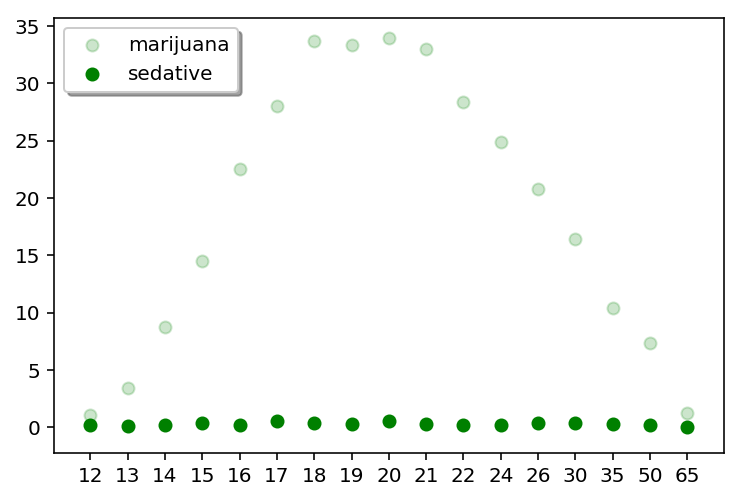

In [27]:
fig, ax = plt.subplots()
plt.scatter(drug['age'], drug['marijuana-use'], color = 'green', alpha = 0.2, label = 'marijuana')
plt.scatter(drug['age'], drug['sedative-use'], color = 'green', label = 'sedative')
# p = plt.axvspan(17, 22, facecolor='#2ca02c', alpha=0.05)
# p = plt.axvspan(19, 24, facecolor='blue', alpha=0.1)
legend = ax.legend(loc='upper left', shadow=True)

### Comments

In the previous section we have seen that the mean use across all drugs grouped by age follows what heavily resembles a left-skewed normal distribution. Mapping out sample sizes in each group shows a significant number of outliers.

This indicates:

1. Outliers pull the mean up so it does not make sense to compute means down, only across.
2. A standardization/resampling is in order.
3. I would like to get my hands on the original data set.

**Report**


Marijuana appears to be a gateway drug for harder drugs, but not softer drugs.
Its own gateway drug class are inhalants.
There is a strong correlation between the drop of marijuana use at the age of 21 and increase of hallucinogen use. Research by NIH (https://www.ncbi.nlm.nih.gov/pubmed/9023070) shows that this is due to transitioning from adolescence to adulthood.



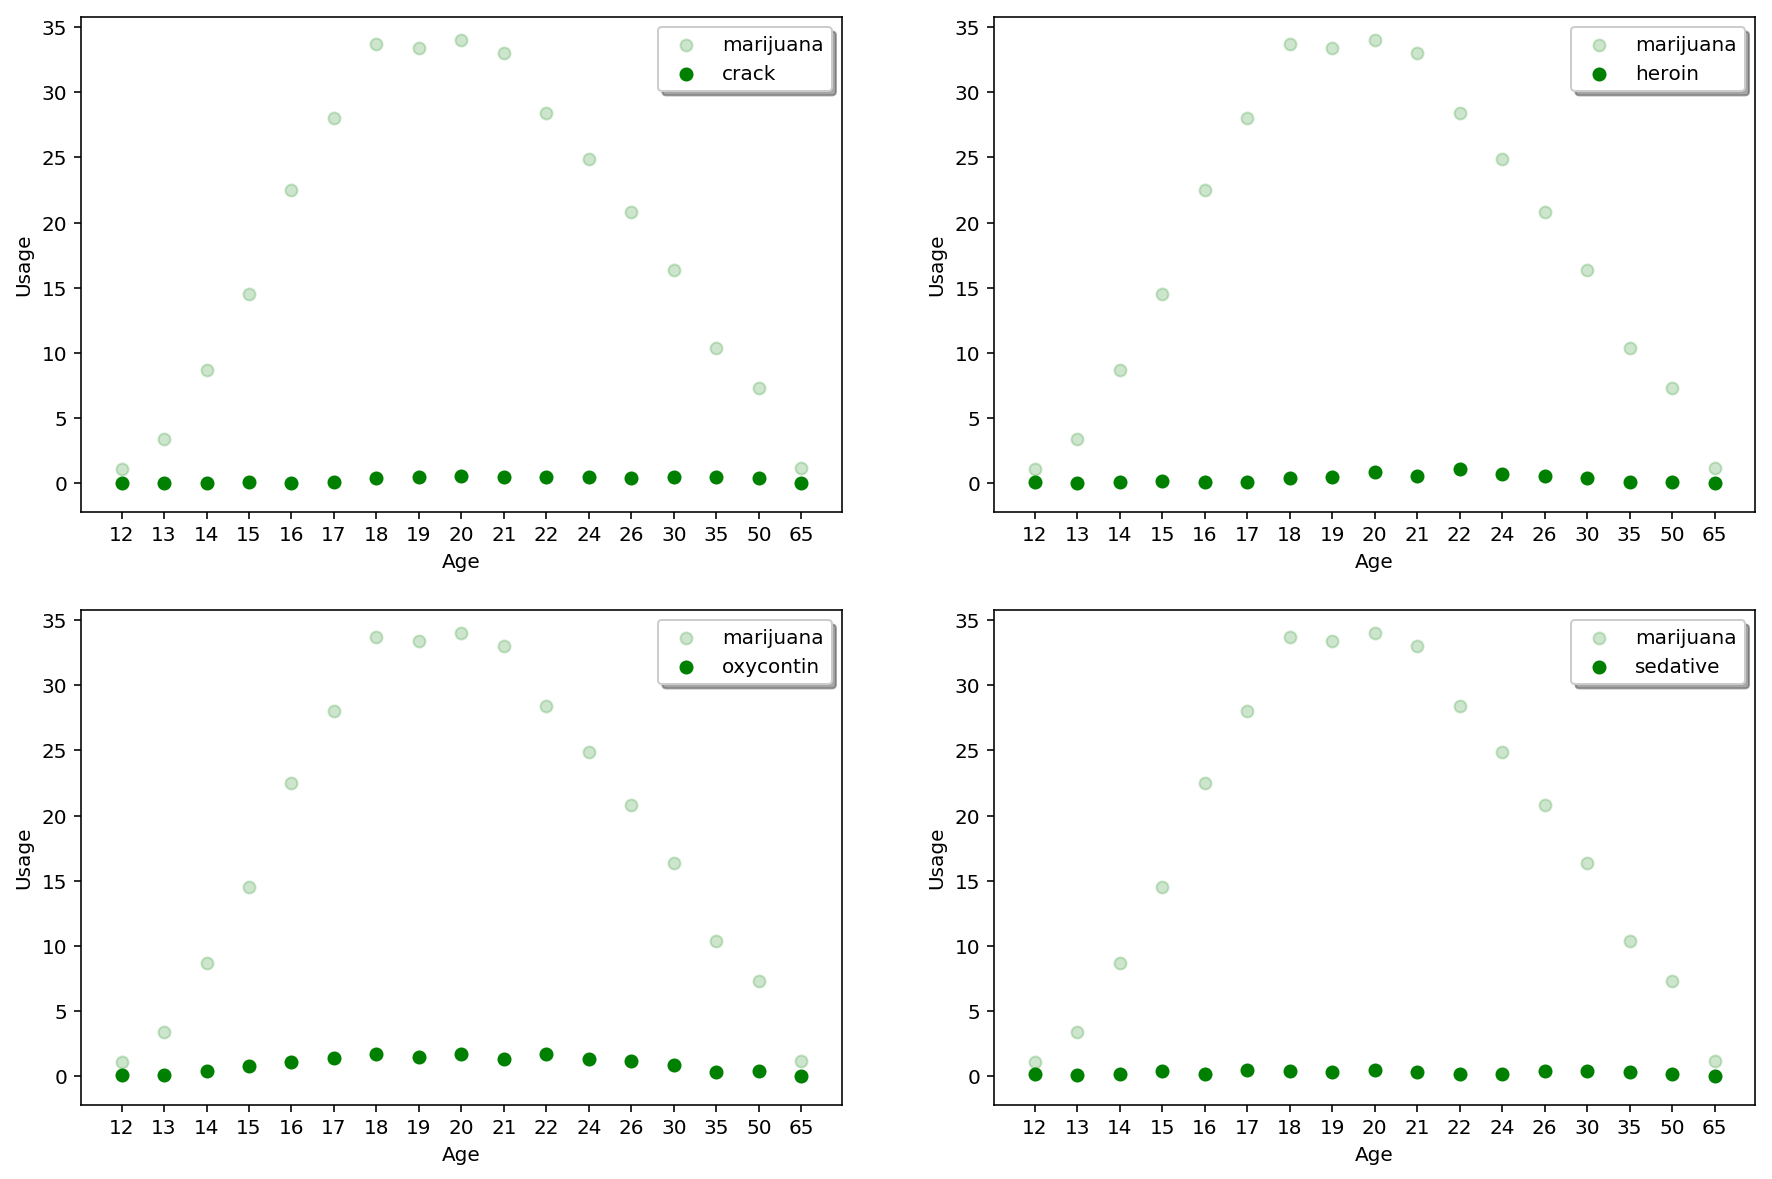

In [29]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 10)

plt.subplot(2, 2, 1)
plt.scatter(drug['age'], drug['marijuana-use'], color = 'green', alpha = 0.2, label = 'marijuana')
plt.scatter(drug['age'], drug['crack-use'], color = 'green', label = 'crack')
plt.legend(shadow=True, fancybox=True)
plt.xlabel("Age")
plt.ylabel("Usage")

plt.subplot(2, 2, 2)
plt.scatter(drug['age'], drug['marijuana-use'], color = 'green', alpha = 0.2, label = 'marijuana')
plt.scatter(drug['age'], drug['heroin-use'], color = 'green', label = 'heroin')
plt.legend(shadow=True, fancybox=True)
plt.xlabel("Age")
plt.ylabel("Usage")

plt.subplot(2, 2, 3)
plt.scatter(drug['age'], drug['marijuana-use'], color = 'green', alpha = 0.2, label = 'marijuana')
plt.scatter(drug['age'], drug['oxycontin-use'], color = 'green', label = 'oxycontin')
plt.legend(shadow=True, fancybox=True)
plt.xlabel("Age")
plt.ylabel("Usage")

plt.subplot(2, 2, 4)
plt.scatter(drug['age'], drug['marijuana-use'], color = 'green', alpha = 0.2, label = 'marijuana')
plt.scatter(drug['age'], drug['sedative-use'], color = 'green', label = 'sedative')
plt.legend(shadow=True, fancybox=True)
plt.xlabel("Age")
plt.ylabel("Usage")

plt.show()